In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Value import Value, draw_dot
from Neuron import Neuron, Layer, MLP

## Value

In [2]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b;    e.label='e'
d = e + c;    d.label='d'
f = Value(-2.0, label='f')
L = d*f;     L.label='L'
L

Value(data=-8.0)

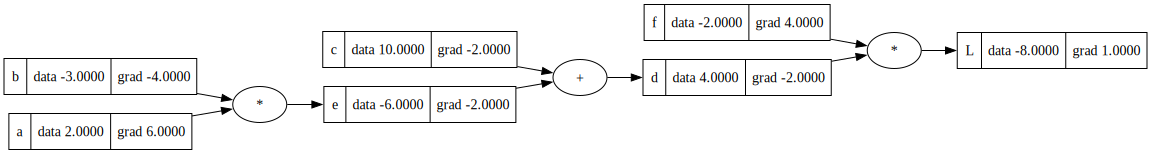

In [3]:
L.backward()
draw_dot(L)

## Neuron

In [4]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.9993773569537355)

## Layer

In [5]:
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value(data=0.9994739250613305),
 Value(data=-0.910077335843998),
 Value(data=0.9985562328400719)]

## MLP

In [6]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.7838986111619265)

## Tweaking MLP

In [7]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.4922277476060012)

In [8]:
# Data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

print('Current Predictions:')
[n(x) for x in xs]

Current Predictions:


[Value(data=-0.4922277476060012),
 Value(data=0.8161704653119461),
 Value(data=0.12271786892328285),
 Value(data=0.005912949359829696)]

In [9]:
# Tweaking
for k in range(10):
    # Forward Pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # Zero grad
    for p in n.parameters():
        p.grad = 0.0

    # Backward
    loss.backward()

    # Update
    for p in n.parameters():
        p.data -= 0.2 * p.grad

    print(k, loss.data)

0 7.773923287246801
1 4.6908952609964585
2 4.556753267807882
3 7.447430302869924
4 4.660062611653517
5 6.886477400994735
6 5.479978498103169
7 1.8340617187417918
8 0.07978622350785461
9 0.040428811118419145


In [10]:
print('After Tweaking:')
[n(x) for x in xs]

After Tweaking:


[Value(data=0.9247430504974155),
 Value(data=-0.9389051631502326),
 Value(data=-0.8715244591415173),
 Value(data=0.9281374137922874)]